# Fourier Transform
***
### Introduction
<img src="https://www.thefouriertransform.com/fourierPair.gif" width=500 height=400 />
<br>

Fourier Transform is a *mathematical technique* for **analysing** real-world signals. It **transforms** *function of time (waveform)* into *function of frequency* as visualise above.

Fourier transform **"smoothens" signals** and interpolate functions to **remove extra noise** when processing images or sounds. For instance, a two-dimensional Fourier transform can be used to quickly eliminate the high spatial frequency edges of pixels when processing pixelated images.

There are few components that are important when Fourier Transform in being discussed. For instance, sinusoid (graphs) and complex numbers (calculations).

References: __[Introduction to Complex Math](https://www.thefouriertransform.com/math/complexmath.php), [Fourier Transform Techniques](https://www.sciencedirect.com/science/article/pii/B0123693977002107)__

## Sinusoid

Sinusoid is used to **express curves** with their period, wavelength and frequency and can be expressed as:
>$f(x) = A sin (2\pi ft + c)$ or $f(x) = A sin (w x + c)$
<br>
> *$A$ - amplitude*
<br>
> *$f$ - frequency*
<br>
> *$w$ - angular frequency, derives 2\pi f*
<br>
> *$c$ - phase(shift)*


References: __[The Fourier Transform and Its Math Explained From Scratch](https://programmathically.com/the-fourier-transform-and-its-math-explained-from-scratch/)[Sinusoid](https://mathworld.wolfram.com/Sinusoid.html), [Sine wave](https://en.wikipedia.org/wiki/Sine_wave)__

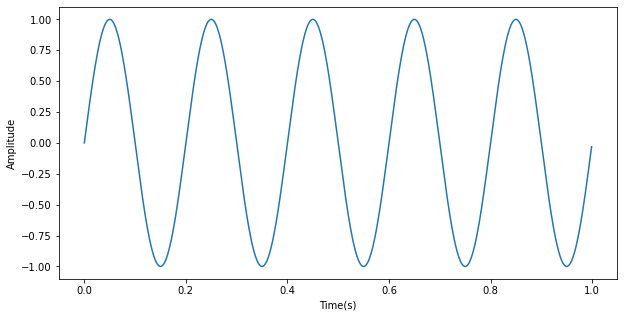

In [1]:
import matplotlib.pyplot as plt
import numpy as np

amplitude = 1
frequency = 5
time = np.arange(0, 1, 0.001)
phase = 0

sinusoidal_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(s)")

# Plot the time-domain signal
ax.plot(time, sinusoidal_wave)
plt.show()

## Complex Numbers
***
It is vital to go through some basics of complex numbers as Fourier Transforms are carried out using *complex numbers*. 

Complex numbers consists of a **real($x$)** and an **imaginary part($iy$)** as shown:
>$z = x + iy$

However, to reduce complexity, examples on how addition, subtraction and multiplcation work for complex numbers are shown without the imaginary number($i$).

Reference: __[Introduction to Complex Math](https://www.thefouriertransform.com/math/complexmath.php)__

In [2]:
# A tuple x (a set of values) of length 2.
x = (1, -2)
x

(1, -2)

In [3]:
# A tuple y (a set of values) of length 2.
y = (-3, 4)
y

(-3, 4)

In [4]:
# Addition.
def add(x, y):
    return (x[0] + y[0], x[1] + y[1])
add(x, y)

(-2, 2)

In [5]:
# Subtraction.
def subtract(x, y):
    return (x[0] - y[0], x[1] - y[1])
subtract(x, y)

(4, -6)

In [6]:
# Multiplication.
def multiply(x, y):
    return ((x[0] * y[0]) - (x[1] * y[1]), (x[0] * y[1]) + (x[1] * y[0]))
multiply(x, y)

(5, 10)

## Fourier Transform
***
$y[k] = \sum \limits _{n=0}^{N-1} e^{-2\pi j\frac{kn}{N}} x[n]$

This equation shows how fourier transform is calculated with combinations of topics discussed previously. First, manual calculation will be shown.

Note: The first output is the *sum of $x$*.

Reference: __[Fast Fourier Transform](https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/04-fourier-transform.ipynb)__

In [7]:
import numpy as np

# Test array.
x = np.array([1.6, 2.2, 1.3, -1.5, 1.5])

# Output array.
y = []

N = len(x)

# Do calculations for each element of the array.
for k in range(N):
    y_k = 0.0
    for n in range(N):
        # Increment the value of y[k].
        y_k = y_k + (np.e**(-2 * np.pi * 1j * k * n / N) * x[n])
    y.append(y_k)

np.array(y)

array([ 5.1       +0.j        ,  2.90516628-2.31153827j,
       -1.45516628+2.25150857j, -1.45516628-2.25150857j,
        2.90516628+2.31153827j])

### Scipy and Numpy 
Instead of calculating manually, both scipy and numpy provide functions for fourier transform and the inverse of it too. Output from both scipy and numpy should be the same  from previous manual demonstration output.

References: __[Fourier Transforms (scipy.fft)](https://docs.scipy.org/doc/scipy/tutorial/fft.html), [numpy.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html), [Working with floating point NumPy arrays for comparison and related operations](https://stackoverflow.com/questions/39757559/working-with-floating-point-numpy-arrays-for-comparison-and-related-operations/39758154#39758154)__

In [8]:
import scipy.fft as fft # scipy.

s = fft.fft(x) # fourier transform using scipy.
inv_s = fft.ifft(s) # inverse using scipy.
print(s)
print(inv_s)

[ 5.1       -0.j          2.90516628-2.31153827j -1.45516628+2.25150857j
 -1.45516628-2.25150857j  2.90516628+2.31153827j]
[ 1.6+0.j  2.2+0.j  1.3+0.j -1.5+0.j  1.5+0.j]


In [9]:
from numpy.fft import fft, ifft # numpy.

n = fft(x) # fourier transform using numpy.
inv_n = ifft(s) # inverse using numpy.
print(n)
print(inv_n)

[ 5.1       +0.j          2.90516628-2.31153827j -1.45516628+2.25150857j
 -1.45516628-2.25150857j  2.90516628+2.31153827j]
[ 1.6+0.j  2.2+0.j  1.3+0.j -1.5+0.j  1.5+0.j]


In [10]:
# check if fft works fine.
np.isclose(x, inv_n)

array([ True,  True,  True,  True,  True])

### Plotting
After knowing the how Fourier Transform works, it is time to plot it. Two similar signals (sine waves) that are similar from [lecture notes](https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/04-fourier-transform.ipynb) will be generated for plotting.

In [11]:
# Number of samples.
N = 600

# Spacing between samples.
T = 1.0 / 800.0

# Range of x (input) values.
x = np.linspace(0.0, N*T, N, endpoint=False)

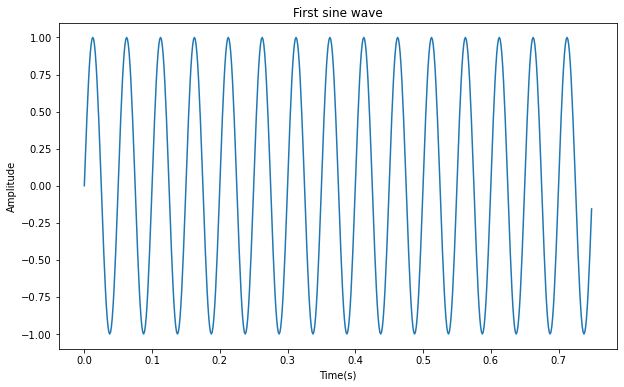

In [12]:
# First sine wave/signal.
y_0 = np.sin(40 * 1.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("First sine wave")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(s)")
ax.plot(x, y_0);

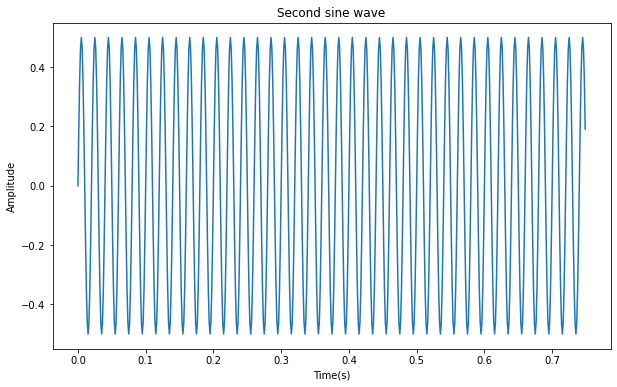

In [13]:
# Second sine wave/signal.
y_1 =  0.5 * np.sin(50.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Second sine wave")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(s)")
ax.plot(x, y_1)

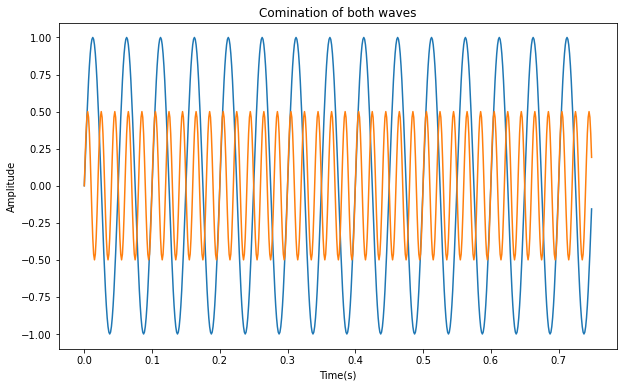

In [14]:
# Combination of both waves.
# First sine wave.
y_0 = np.sin(40 * 1.0 * np.pi * x)
# Second sine wave.
y_1 =  0.5 * np.sin(50.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Comination of both waves")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(s)")
ax.plot(x, y_0);
ax.plot(x, y_1)

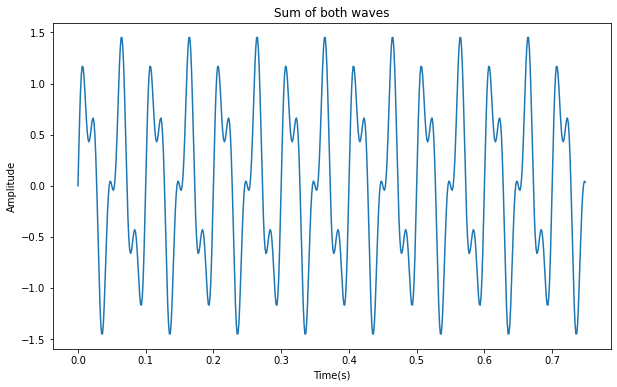

In [15]:
# Sum of both waves.
y = y_0 + y_1

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Sum of both waves")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(s)")
ax.plot(x, y);

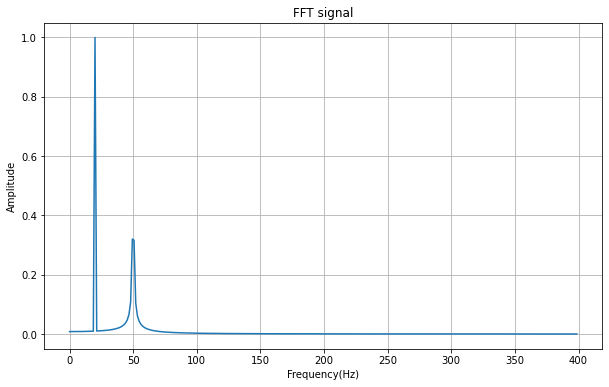

In [16]:
from numpy.fft import fftfreq # numpy
# Fast Fourier transform of y.
yf = fft(y)

# Frequencies for y.
xf = fftfreq(N, T)[:N//2]

# First sine wave.
y_1 =  0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("FFT signal")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequency(Hz)")
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid();